In [28]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dept             86 non-null     int64  
 1   Region           85 non-null     object 
 2   Department       86 non-null     object 
 3   Crime_pers       86 non-null     int64  
 4   Crime_prop       86 non-null     int64  
 5   Literacy         86 non-null     int64  
 6   Donations        86 non-null     int64  
 7   Infants          86 non-null     int64  
 8   Suicides         86 non-null     int64  
 9   MainCity         86 non-null     object 
 10  Wealth           86 non-null     int64  
 11  Commerce         86 non-null     int64  
 12  Clergy           86 non-null     int64  
 13  Crime_parents    86 non-null     int64  
 14  Infanticide      86 non-null     int64  
 15  Donation_clergy  86 non-null     int64  
 16  Lottery          86 non-null     int64  
 17  Desertion        8

In [5]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = df[vars]
df.tail()

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [6]:
df = df.dropna()
df.tail()

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


## Motivation
We want to know whether literacy rates in the 86 French departments are associated with per capita wagers on the Royal Lottery in the 1820s. We need to control for the level of wealth in each department, and we also want to include a series of dummy variables on the right-hand side of our regression equation to control for unobserved heterogeneity due to regional effects. The model is estimated using ordinary least squares regression (OLS).

## Design matrices (endog & exog)

To fit most of the models covered by statsmodels, you will need to create two design matrices. The first is a matrix of endogenous variable(s) (i.e. dependent, response, regressand, etc.). The second is a matrix of exogenous variable(s) (i.e. independent, predictor, regressor, etc.). The OLS coefficient estimates are calculated as usual:

$\hat{\beta} = (X'X)^{-1} X'y$

where 𝑦 is an 𝑁×1 column of data on lottery wagers per capita (Lottery). 𝑋 is 𝑁×7 with an intercept, the Literacy and Wealth variables, and 4 region binary variables.

Notice that `dmatrices` has

- split the categorical Region variable into a set of indicator variables.

- added a constant to the exogenous regressors matrix.

- returned pandas DataFrames instead of simple numpy arrays. This is useful because DataFrames allow statsmodels to carry-over meta-data (e.g. variable names) when reporting results.

In [7]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [9]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lottery  85 non-null     float64
dtypes: float64(1)
memory usage: 3.8 KB


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Intercept    85 non-null     float64
 1   Region[T.E]  85 non-null     float64
 2   Region[T.N]  85 non-null     float64
 3   Region[T.S]  85 non-null     float64
 4   Region[T.W]  85 non-null     float64
 5   Literacy     85 non-null     float64
 6   Wealth       85 non-null     float64
dtypes: float64(7)
memory usage: 7.8 KB


## Model fit and summary
Fitting a model in statsmodels typically involves 3 easy steps:

- Use the model class to describe the model

- Fit the model using a class method

- Inspect the results using a summary method

In [11]:
mod = sm.OLS(y, X) # describe model
res = mod.fit() # fit model
res.summary() # summarize model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           1.07e-05
Time:                        15:41:04   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      0.000      19.826      57.478
Region[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
Region[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
Region[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
Region[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy       -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth          0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [13]:
res.rsquared

0.337950869192882

## Diagnostics and specification tests
statsmodels allows you to conduct a range of useful regression diagnostics and specification tests. For instance, apply the Rainbow test for linearity (the null hypothesis is that the relationship is properly modelled as linear):

In [14]:
sm.stats.linear_rainbow(res)

(0.8472339976156916, 0.6997965543621643)

In [17]:
# print the docstring to know the meaning of the returned numbers above
print(sm.stats.linear_rainbow.__doc__)


    Rainbow test for linearity

    The null hypothesis is the fit of the model using full sample is the same
    as using a central subset. The alternative is that the fits are difference.
    The rainbow test has power against many different forms of nonlinearity.

    Parameters
    ----------
    res : RegressionResults
        A results instance from a linear regression.
    frac : float, default 0.5
        The fraction of the data to include in the center model.
    order_by : {ndarray, str, List[str]}, default None
        If an ndarray, the values in the array are used to sort the
        observations. If a string or a list of strings, these are interpreted
        as column name(s) which are then used to lexicographically sort the
        data.
    use_distance : bool, default False
        Flag indicating whether data should be ordered by the Mahalanobis
        distance to the center.
    center : {float, int}, default None
        If a float, the value must be in [0, 1] a

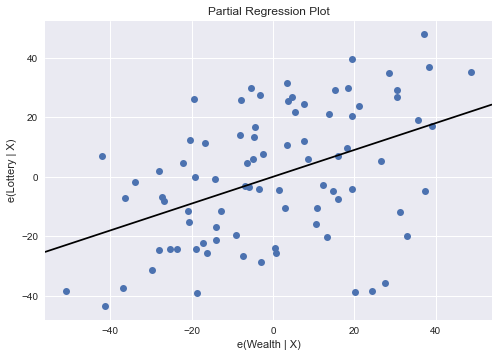

In [29]:
# we can draw a plot of partial regression for a set of regressors by
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'], 
                                data=df, obs_labels=False)
plt.show()